Importing Required Libraries

In [59]:
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import emoji
import nltk
from textblob import TextBlob

Seperating Messages and Dates using regular Expressions

In [60]:
f = open('./chats/WhatsApp Chat with JSS NOIDA MCA STUDENTS.txt','r',encoding='utf-8')
data = f.read()
pattern = "\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\w\w\s-"
messages = re.split(pattern,data)[1:]
dates = re.findall(pattern,data)

Preparing the Pandas DataFrame and coonverting dates in python Date format

In [61]:
# converting into pandas dataframe
df = pd.DataFrame({'user_message':messages,'message_dates': dates})

#convert message_date type
df['message_dates'] = pd.to_datetime(df['message_dates'], format='%m/%d/%y, %H:%M %p -')

df.rename(columns = {'message_dates': 'date'}, inplace = True)
df.head(20)

,user_message,date
0,Messages and calls are end-to-end encrypted. ...,2022-04-15 06:12:00
1,Eshu Jss Mca: Kal koi clg ja rha h kya\n,2022-04-15 10:32:00
2,Riya Gupta Jss Mca: Cllg direct Monday ko jan...,2022-04-15 10:36:00
3,+91 70371 85552: *Zealicon m entry k koi char...,2022-04-17 08:37:00
4,+91 93691 60394: Zealicon h ka\n,2022-04-17 08:58:00
5,+91 70371 85552: Apne clg m hone wale fest 26...,2022-04-17 09:01:00
6,+91 93691 60394: Event kon kon sa h\n,2022-04-17 09:22:00
7,+91 70371 85552: Zealicon k page h Instagram ...,2022-04-17 09:24:00
8,+91 93691 60394: Ok ji\n,2022-04-17 09:25:00
9,Divyansh Jss Mca: Bhai tu participate karle.....,2022-04-17 11:05:00


Seperating user names and messages in the dataframe(df) and adding new Columns

In [62]:
#seperate name and message
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\W\w]+?):\s',message)
    # print(entry)
    if(entry[1:]): #username
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('Group notification')
        messages.append(entry[0])

df['users'] = users
df['messages'] = messages
df.drop(columns=['user_message'], inplace=True)
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df = df[df['users'] != 'Group notification']

period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))
df['period'] = period
df.head(8)


,date,users,messages,only_date,year,month_num,month,day,day_name,hour,minute,period
1,2022-04-15 10:32:00,Eshu Jss Mca,Kal koi clg ja rha h kya\n,2022-04-15,2022,4,April,15,Friday,10,32,10-11
2,2022-04-15 10:36:00,Riya Gupta Jss Mca,Cllg direct Monday ko jana h ab Saturday ko mn...,2022-04-15,2022,4,April,15,Friday,10,36,10-11
3,2022-04-17 08:37:00,+91 70371 85552,*Zealicon m entry k koi charge ni h incase apk...,2022-04-17,2022,4,April,17,Sunday,8,37,8-9
4,2022-04-17 08:58:00,+91 93691 60394,Zealicon h ka\n,2022-04-17,2022,4,April,17,Sunday,8,58,8-9
5,2022-04-17 09:01:00,+91 70371 85552,Apne clg m hone wale fest 26-28 April\n,2022-04-17,2022,4,April,17,Sunday,9,1,9-10
6,2022-04-17 09:22:00,+91 93691 60394,Event kon kon sa h\n,2022-04-17,2022,4,April,17,Sunday,9,22,9-10
7,2022-04-17 09:24:00,+91 70371 85552,Zealicon k page h Instagram p uspe dekh lo\n,2022-04-17,2022,4,April,17,Sunday,9,24,9-10
8,2022-04-17 09:25:00,+91 93691 60394,Ok ji\n,2022-04-17,2022,4,April,17,Sunday,9,25,9-10


In [63]:
#sentiment requirements
# nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
    # Object
sentiments = SentimentIntensityAnalyzer()

# Creating different columns for (Positive/Negative/Neutral)
df["po"] = [sentiments.polarity_scores(i)["pos"] for i in df["messages"]] # Positive
df["ne"] = [sentiments.polarity_scores(i)["neg"] for i in df["messages"]] # Negative
df["nu"] = [sentiments.polarity_scores(i)["neu"] for i in df["messages"]] # Neutral

# To indentify true sentiment per row in message column
def sentiment(d):
    if d["po"] >= d["ne"] and d["po"] >= d["nu"]:
        return 1
    if d["ne"] >= d["po"] and d["ne"] >= d["nu"]:
        return -1
    if d["nu"] >= d["po"] and d["nu"] >= d["ne"]:
        return 0
# Creating new column & Applying function
df['value'] = df.apply(lambda row: sentiment(row), axis=1)
df.head(8)

,date,users,messages,only_date,year,month_num,month,day,day_name,hour,minute,period,po,ne,nu,value
1,2022-04-15 10:32:00,Eshu Jss Mca,Kal koi clg ja rha h kya\n,2022-04-15,2022,4,April,15,Friday,10,32,10-11,0.000,0.0,1.000,0
2,2022-04-15 10:36:00,Riya Gupta Jss Mca,Cllg direct Monday ko jana h ab Saturday ko mn...,2022-04-15,2022,4,April,15,Friday,10,36,10-11,0.000,0.0,1.000,0
3,2022-04-17 08:37:00,+91 70371 85552,*Zealicon m entry k koi charge ni h incase apk...,2022-04-17,2022,4,April,17,Sunday,8,37,8-9,0.130,0.0,0.870,0
4,2022-04-17 08:58:00,+91 93691 60394,Zealicon h ka\n,2022-04-17,2022,4,April,17,Sunday,8,58,8-9,0.000,0.0,1.000,0
5,2022-04-17 09:01:00,+91 70371 85552,Apne clg m hone wale fest 26-28 April\n,2022-04-17,2022,4,April,17,Sunday,9,1,9-10,0.000,0.0,1.000,0
6,2022-04-17 09:22:00,+91 93691 60394,Event kon kon sa h\n,2022-04-17,2022,4,April,17,Sunday,9,22,9-10,0.000,0.0,1.000,0
7,2022-04-17 09:24:00,+91 70371 85552,Zealicon k page h Instagram p uspe dekh lo\n,2022-04-17,2022,4,April,17,Sunday,9,24,9-10,0.000,0.0,1.000,0
8,2022-04-17 09:25:00,+91 93691 60394,Ok ji\n,2022-04-17,2022,4,April,17,Sunday,9,25,9-10,0.688,0.0,0.312,1


Removing Group Notifications messages from the dataframe

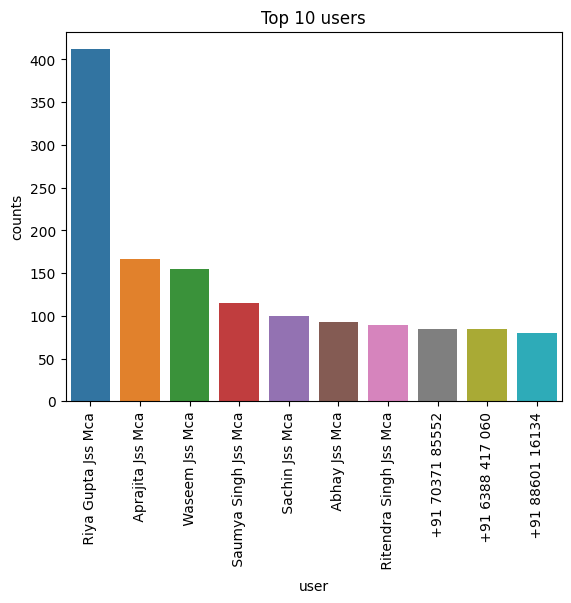

In [64]:
# fetching valid users messages excluding group notifications
df = df[df['users'] != 'Group notification']
users_df = df['users'].value_counts().reset_index()
users_df.rename(columns = {'index': 'user', 'users': 'counts'}, inplace = True)
users_df.head()
# seperting name and message count to plot a bar graph and displaying percentage of user messages
# top 10 users
name = users_df.user[:10]
count = users_df.counts[:10]
ax = sns.barplot(x=name, y=count, data=users_df)
ax.set_title('Top 10 users')
plt.xticks(rotation=90)
plt.show()
# round(df['users'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'user', 'users':'percent'})

Preparing wordcloud after removing stop words and Media messages

In [65]:
#  word cloud of most common chat words excluding media messages
#  stop words
f = open('./Hinglish_words.txt','r',encoding='utf-8')
stop_words = f.read().lower().split('\n')

# removing group notification messages
df_user_chat = df[df['users'] != 'Group notification']
# removing media messages
df_user_chat = df_user_chat[df_user_chat['messages'] != '<Media omitted>\n']



# No of words without stop words, media and group notification
words = []
for message in df_user_chat['messages']:
    for word in message.split():
        if word not in stop_words:
            words.append(word.lower())

# word cloud
wc = WordCloud(background_color='white', width=800, height=400, min_font_size=10)
df_wc = wc.generate(' '.join(words))
# plt.figure(figsize=(10,5))
# plt.imshow(df_wc)


most_common_words = pd.DataFrame(Counter(words).most_common(20), columns=['words', 'count'])
most_common_words.head(7)
# bar graph of most common words
# ax = sns.barplot(x='words', y='count', data=most_common_words)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()
# plt.show()

,words,count
0,birthday,342
1,happy,335
2,thanks,111
3,thank,71
4,class,55
5,assignment,50
6,kr,46


Emoji analysis in the group at group and individual level

([<matplotlib.patches.Wedge at 0x22797760610>,
 [Text(0.6770976489745647, 0.8669133600038226, '🥳'),
  Text(-0.9239165709832289, 0.5969741785559843, '😂'),
  Text(-0.6800191431203851, -0.8646235972894896, '🎂'),
  Text(0.4889435106438858, -0.9853599562592508, '🤣'),
  Text(1.0316728176657814, -0.3816427613482894, '🎉')],
 [Text(0.3693259903497625, 0.4728618327293577, '28.9%'),
  Text(-0.5039544932635793, 0.3256222792123551, '24.0%'),
  Text(-0.3709195326111191, -0.47161287124881246, '23.1%'),
  Text(0.2666964603512104, -0.5374690670505003, '12.8%'),
  Text(0.5627306278176989, -0.20816877891724875, '11.3%')])

d:\coding programs and books\Python\Whatsapp chat\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from current font.
  func(*args, **kwargs)
d:\coding programs and books\Python\Whatsapp chat\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from current font.
  func(*args, **kwargs)
d:\coding programs and books\Python\Whatsapp chat\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  func(*args, **kwargs)
d:\coding programs and books\Python\Whatsapp chat\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  func(*args, **kwargs)
d:\coding programs and books\Python\Whatsapp chat\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) miss

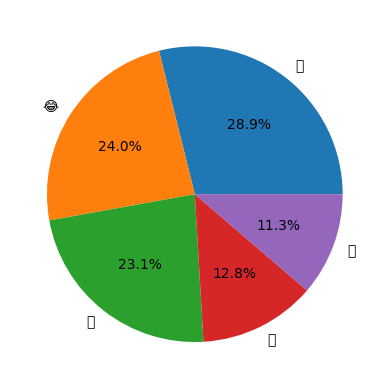

In [66]:
#emoji analysis
emojis = []
for message in df['messages']:
    for c in message:
        if c in emoji.EMOJI_DATA:
            emojis.extend(c)
    
emoji_df = pd.DataFrame(Counter(emojis).most_common(20), columns=['emoji', 'count'])
emoji_df.head()

# plotting emoji count
plt.pie(emoji_df['count'].head(), labels=emoji_df['emoji'].head(), autopct='%1.1f%%')

Messages timeline analysis

monthly messages analysis

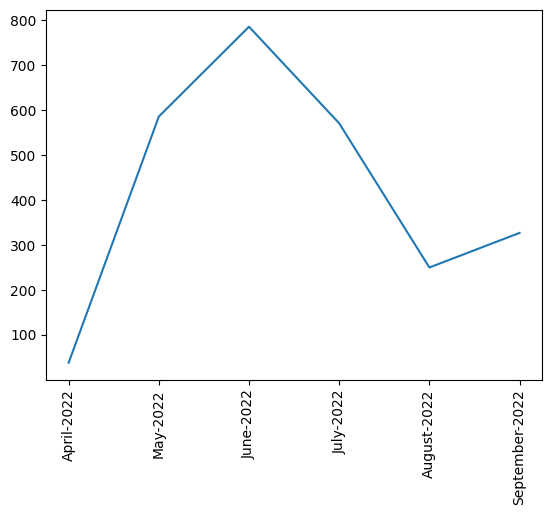

In [67]:
# Monthly message timeline analysis 
monthly_timeline = df.groupby(['year','month_num','month']).count()['messages'].reset_index()
time = []
for i in range(monthly_timeline.shape[0]):
    time.append(monthly_timeline['month'][i] + '-' + str(monthly_timeline['year'][i]))
monthly_timeline['time'] = time
plt.plot(monthly_timeline['time'], monthly_timeline['messages'])
plt.xticks(rotation = 'vertical')
plt.show()

Daily messages analysis

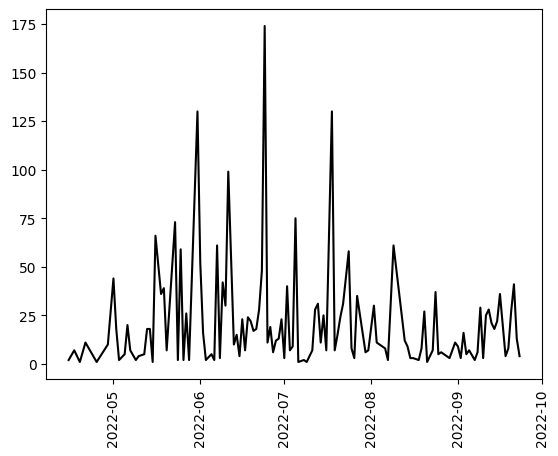

In [68]:
# Daily message timeline analysis
daily_timeline = df.groupby('only_date').count()['messages'].reset_index()
plt.plot(daily_timeline['only_date'], daily_timeline['messages'], color = 'black')
plt.xticks(rotation = 'vertical')
plt.show()

Activity maps Buys weeks and Months

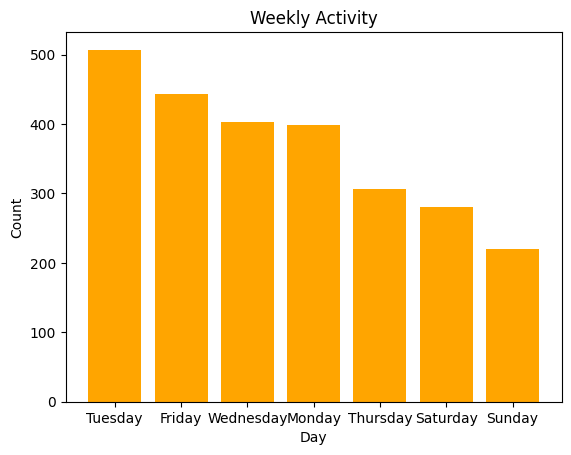

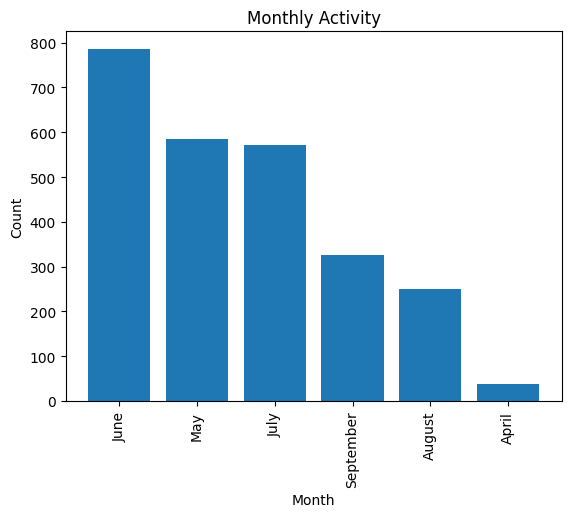

In [69]:
weekly_activity = df['day_name'].value_counts().reset_index().rename(columns={'index':'day', 'day_name':'count'})
monthly_activity = df['month'].value_counts().reset_index().rename(columns={'index':'months', 'month':'count'})
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

# weekly activity
ax1.bar(weekly_activity['day'], weekly_activity['count'], color = 'orange')
ax1.set_title('Weekly Activity')
ax1.set_xlabel('Day')
ax1.set_ylabel('Count')
plt.xticks(rotation = 'vertical')
# plt.show()

# monthly activity
ax2.bar(monthly_activity['months'], monthly_activity['count'])
ax2.set_title('Monthly Activity')
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')
plt.xticks(rotation = 'vertical')
plt.show()



Heat maps for the group

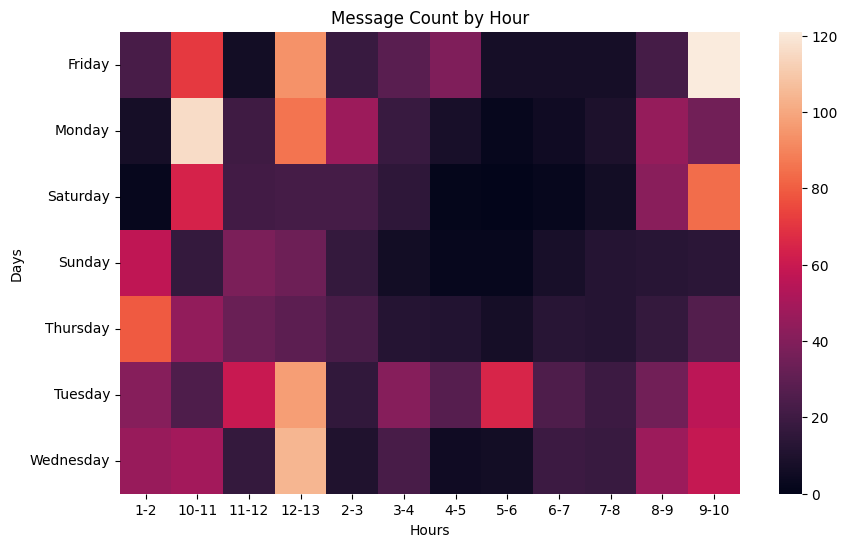

In [70]:
#  plotting message count by hour
user_heatmap = df.pivot_table(index='day_name', columns='period', values='messages', aggfunc='count').fillna(0)
fig,ax = plt.subplots()
fig.set_size_inches(10, 6)
ax = sns.heatmap(user_heatmap)
ax.set_xlabel("Hours")
ax.set_ylabel("Days")
ax.set_title("Message Count by Hour")
plt.show()

fetch_most_busy_user

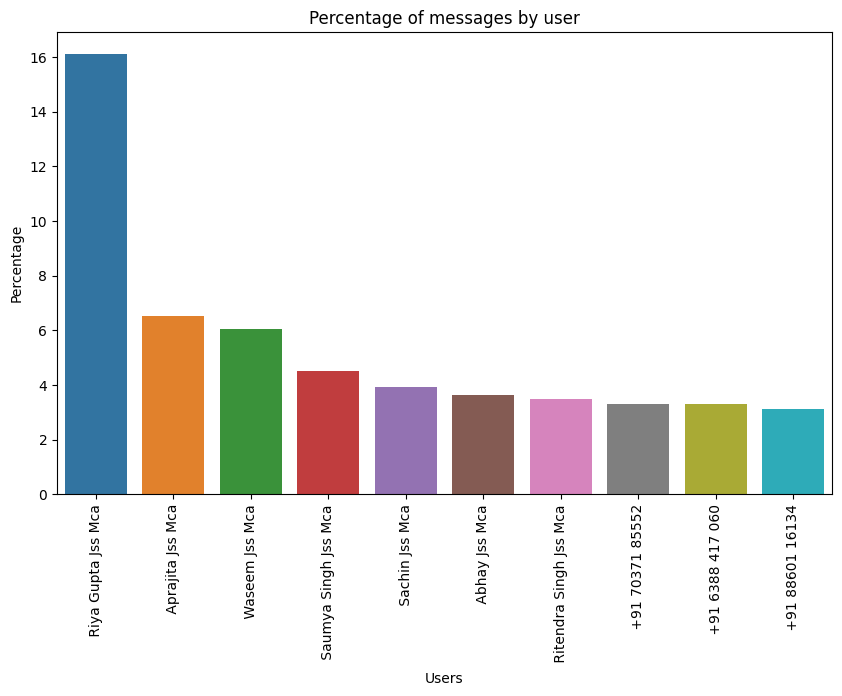

In [71]:
df = df[df['users'] != 'Group notification']
users_df = df['users'].value_counts().reset_index()
users_df.rename(columns = {'index': 'user', 'users': 'counts'}, inplace = True)
prec_df = round(df['users'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'user', 'users':'percent'})
prec_df['counts'] = users_df['counts']
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax = sns.barplot(x='user', y='percent', data=prec_df.head(10))
ax.set_xlabel("Users")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of messages by user")
plt.xticks(rotation = 'vertical')
plt.show()

Sentiment analysis

monthly analysis

In [72]:
def month_activity_map_sentiment(selected_user,df,k):
    if selected_user != 'Overall':
        df = df[df['users'] == selected_user]
    
    df = df[df['value'] == k]
    return df['month'].value_counts()

# for negative sentiment k = -1
busy_month = month_activity_map_sentiment("Overall", df,-1)
busy_month = busy_month.reset_index().rename(columns={'index':'month', 'month':'count'})

# # for neutral sentiment k = 0
# busy_month = month_activity_map_sentiment("Overall", df,0)
# busy_month = busy_month.reset_index().rename(columns={'index':'month', 'month':'count'})

# for positive sentiment k = 1
# busy_month = month_activity_map_sentiment("Overall", df,1)
# busy_month = busy_month.reset_index().rename(columns={'index':'month', 'month':'count'})


busy_month 

,month,count
0,June,8
1,May,3
2,July,2
3,August,1
4,September,1


weekly analysis(heatmap)

In [73]:
def weekly_activity_heatmap(selected_user,df,k):
    if selected_user != 'Overall':
        df = df[df['users'] == selected_user]

    df = df[df['value'] == k]
    
    # Creating heat map
    user_heatmap = df.pivot_table(index='day_name', columns='period', values='messages', aggfunc='count').fillna(0)

    return user_heatmap

# for negative sentiment k = -1
user_heatmap = weekly_activity_heatmap("Overall", df,-1)



# for positive sentiment k = 1
user_heatmap = weekly_activity_heatmap("Overall", df,1)
# for neutral sentiment k = 0
user_heatmap = weekly_activity_heatmap("Overall", df,0)
user_heatmap




period,1-2,10-11,11-12,12-13,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,
Friday,19.0,59.0,5.0,82.0,13.0,21.0,36.0,5.0,6.0,6.0,17.0,108.0
Monday,3.0,102.0,16.0,52.0,29.0,5.0,6.0,1.0,5.0,9.0,36.0,28.0
Saturday,2.0,24.0,5.0,18.0,20.0,14.0,1.0,0.0,2.0,4.0,37.0,60.0
Sunday,38.0,12.0,22.0,26.0,14.0,5.0,2.0,0.0,2.0,8.0,10.0,10.0
Thursday,48.0,39.0,27.0,24.0,15.0,7.0,9.0,1.0,11.0,10.0,15.0,17.0
Tuesday,26.0,18.0,51.0,49.0,12.0,31.0,8.0,35.0,13.0,10.0,17.0,37.0
Wednesday,28.0,41.0,13.0,61.0,7.0,21.0,4.0,5.0,16.0,11.0,36.0,43.0


Daily analysis(activity map)

In [74]:
def daily_activity_map_sentiment(selected_user,df,k):
    if selected_user != 'Overall':
        df = df[df['users'] == selected_user]
    
    df = df[df['value'] == k]
    return df['day_name'].value_counts()

busy_day = daily_activity_map_sentiment('Overall', df,1)
busy_day = busy_day.reset_index().rename(columns={'index':'day', 'day_name':'count'})

# busy_day = daily_activity_map_sentiment('Overall', df,0)
# busy_day = busy_day.reset_index().rename(columns={'index':'day', 'day_name':'count'})

# busy_day = daily_activity_map_sentiment('Overall', df,-1)
# busy_day = busy_day.reset_index().rename(columns={'index':'day', 'day_name':'count'})
busy_day


,day,count
0,Tuesday,199
1,Wednesday,116
2,Monday,104
3,Saturday,93
4,Thursday,80
5,Sunday,70
6,Friday,60


Daily analysis(timeline)

In [75]:
def daily_timeline_sentiment(selected_user,df,k):
    if selected_user != 'Overall':
        df = df[df['users'] == selected_user]

    df = df[df['value']==k]
    # count of message on a specific date
    daily_timeline = df.groupby('only_date').count()['messages'].reset_index()
    return daily_timeline

# for negative sentiment k = -1
daily_timeline = daily_timeline_sentiment('Overall', df,-1)


# for positive sentiment k = 1
# daily_timeline = daily_timeline_sentiment('Overall', df,1)
# for neutral sentiment k = 0
# daily_timeline = daily_timeline_sentiment('Overall', df,0)
daily_timeline

,only_date,messages
0,2022-05-14,1
1,2022-05-23,1
2,2022-05-27,1
3,2022-06-09,1
4,2022-06-21,1
5,2022-06-23,2
6,2022-06-24,3
7,2022-06-26,1
8,2022-07-18,1
9,2022-07-20,1


Most users contribution

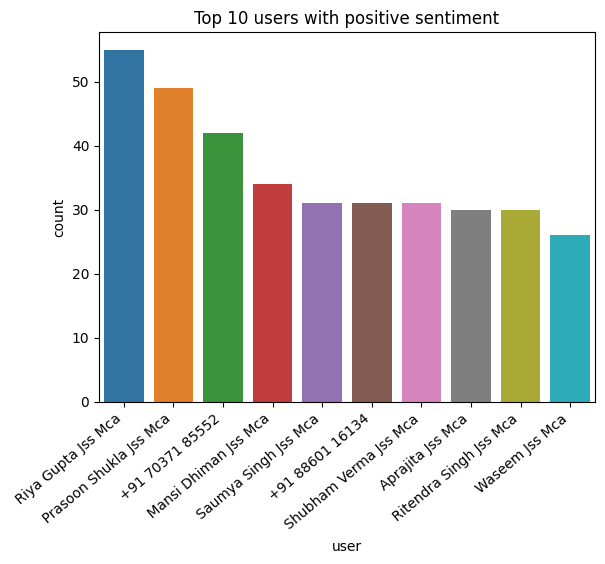

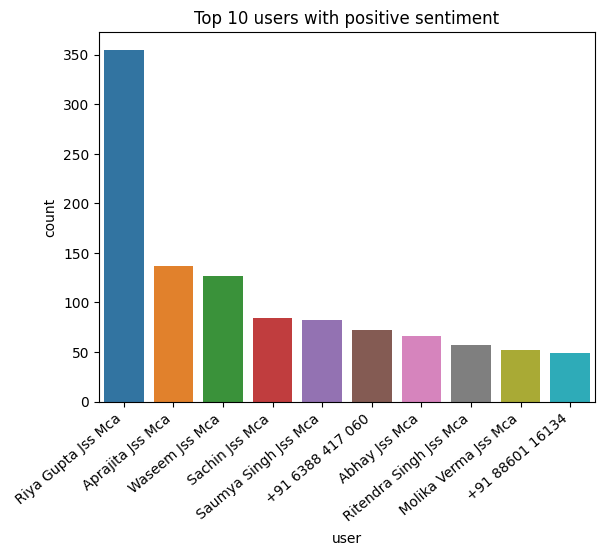

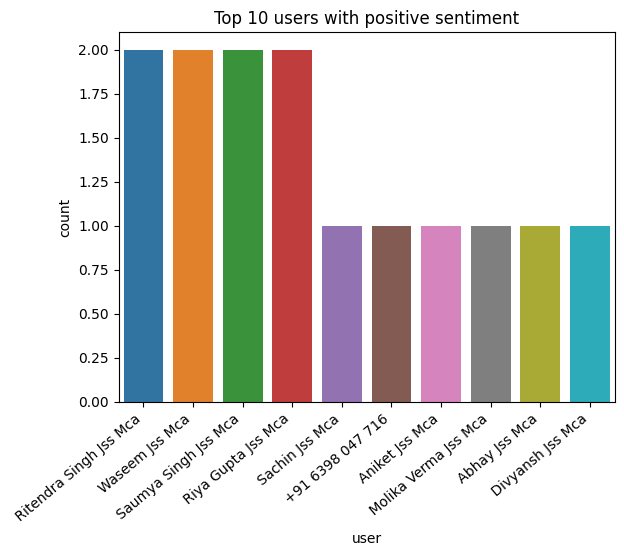

In [76]:
positive = df['users'][df['value'] == 1].value_counts().head(10)
positive = positive.reset_index().rename(columns={'index':'user', 'users':'count'})
fig = plt.subplots()
ax = sns.barplot(x='user', y='count', data=positive)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Top 10 users with positive sentiment")
plt.show()

neutral = df['users'][df['value'] == 0].value_counts().head(10)
neutral = neutral.reset_index().rename(columns={'index':'user', 'users':'count'})
fig = plt.subplots()
ax = sns.barplot(x='user', y='count', data=neutral)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Top 10 users with positive sentiment")
plt.show()

negative = df['users'][df['value'] == -1].value_counts().head(10)
negative = negative.reset_index().rename(columns={'index':'user', 'users':'count'})
fig = plt.subplots()
ax = sns.barplot(x='user', y='count', data=negative)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Top 10 users with positive sentiment")
plt.show()

# negative

wordclouds

In [77]:
def word_util_sentiment(selected_user, df,k):
    if selected_user != 'Overall':
        df = df[df['users'] == selected_user]

    # removing group notification messages
    df_user_chat = df[df['users'] != 'Group notification']
    # removing media messages
    df_user_chat = df_user_chat[df_user_chat['messages'] != '<Media omitted>\n']

    f = open('./Hinglish_words.txt','r',encoding='utf-8')
    stop_words = f.read().lower().split('\n')

    words = []
    for message in df_user_chat['messages']:
        for word in message.split():
            if word not in stop_words:
                words.append(word)

    if k == 1:
        words = [word for word in words if TextBlob(word).sentiment.polarity > 0]
    elif k == -1:
        words = [word for word in words if TextBlob(word).sentiment.polarity < 0]
    else:
        words = [word for word in words if TextBlob(word).sentiment.polarity == 0]
    
    return words

# for negative sentiment k = -1
words = word_util_sentiment('Overall', df,-1)


# for neutral sentiment k = 0
# words = word_util_sentiment('Overall', df,0)
# for positive sentiment k = 1
# words = word_util_sentiment('Overall', df,1)

# word_df = pd.DataFrame(words, columns=['words']).value_counts()
# word_df = word_df.reset_index().rename(columns={0:'count'})
# word_df.head(10)